# 1. Setup Mario

In [8]:
# Import Dependencies
import gymnasium as gym
import os
import gym_super_mario_bros
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT # Import the SIMPLIFIED controls

In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [2]:
# Setup Game, Ignore the logger.warn( errors
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True,render_mode='human') # Discrete(256)
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Discrete(7), To simplify controls from 256 to 7

/Users/kshitija/Desktop/AI/RL/myenv/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/Users/kshitija/Desktop/AI/RL/myenv/lib/python3.11/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [4]:
env.action_space

Discrete(7)

In [5]:
env.observation_space.shape

(240, 256, 3)

# 2. Testing the Enviroment

In [11]:
# # Note: stop this cell before continuing.
# done = True
# # Loop through each frame in the game
# for step in range(50000): 
#     # Start the game to begin with 
#     if done: 
#         # Start the gamee
#         env.reset()
#     # Do random actions
#     state, reward, done, info, _ = env.step(env.action_space.sample())
#     # Show the game on the screen
#     env.render()
# # Close the game
# env.close()

In [12]:
# env.reset()

In [15]:
# Do env.reset() before env.step() to understand each values in it.
# [0]: next state
# [1]: reward
# [2]: terminated
# [3]: truncated
# [4]: info

# env.step(1)[4]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 41,
 'y_pos': 79}

## Understanding Reward Function for the Enviroment

* The reward function assumes the objective of the game is to move as far right as possible (increase the agent's x value), as fast as possible, without dying.

# 3. Preprocessing the Game (Enviroment) 

In [3]:
# Import GrayScaling Wrapper and Frame Stacker Wrapper (Ignore Errors)
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
import matplotlib.pyplot as plt
from nes_py.wrappers import JoypadSpace

env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True,render_mode='human')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

# Grayscale and Wrap inside Dummy Enviroment
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])

# Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

/Users/kshitija/Desktop/AI/RL/myenv/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/Users/kshitija/Desktop/AI/RL/myenv/lib/python3.11/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
/Users/kshitija/Desktop/AI/RL/myenv/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


(1, 240, 256, 4)


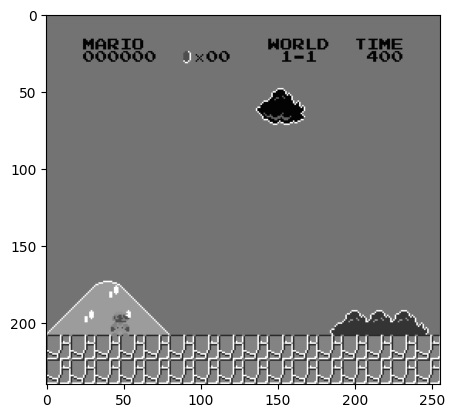

In [28]:
# # Using matplotlib to show the frame
# state = env.reset()
# print(state.shape)
# plt.imshow(state[0])

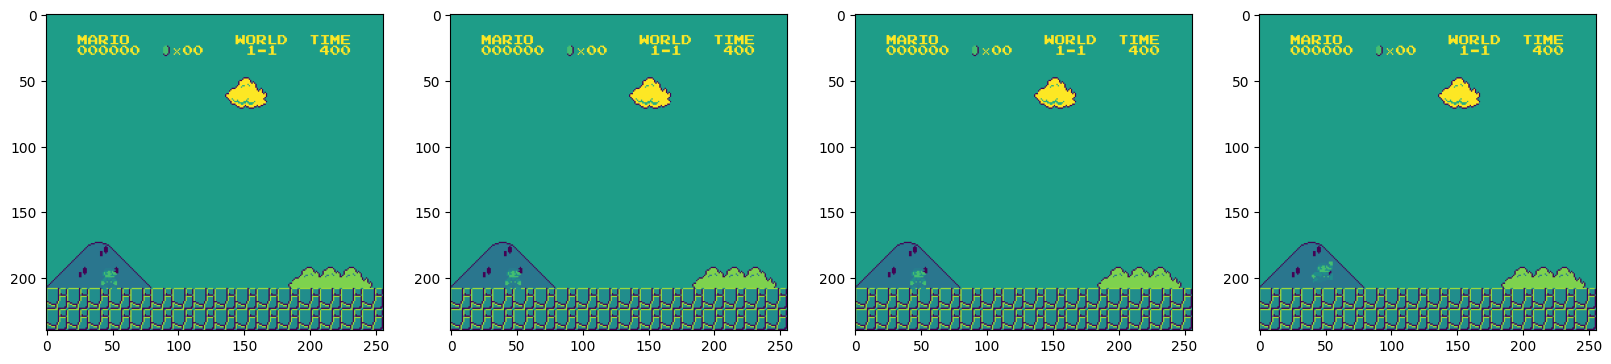

In [32]:
# # Visualizing the Frame Stack
# state, reward, done, info = env.step([env.action_space.sample()])

# plt.figure(figsize=(20,20))
# for idx in range(state.shape[3]):
#     plt.subplot(1,4,idx+1)
#     plt.imshow(state[0][:,:,idx])
# plt.show()

# 4. Train and Save the RL Model

In [34]:
import os
from stable_baselines3 import PPO

# Use of Callbacks is optional for logging, model saving, or early stopping, but not implemented in this script.
# from stable_baselines3.common.callbacks import BaseCallback 

# class TrainAndLoggingCallback(BaseCallback):
#     def __init__(self, check_freq, save_path, verbose=1):
#         super(TrainAndLoggingCallback, self).__init__(verbose)
#         self.check_freq = check_freq
#         self.save_path = save_path

#     def _init_callback(self):
#         if self.save_path is not None:
#             os.makedirs(self.save_path, exist_ok=True)

#     def _on_step(self):
#         if self.n_calls % self.check_freq == 0:
#             model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
#             self.model.save(model_path)
#         return True

# # Setup model saving callback
# callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [4]:
# Create a 'Training' directory with 'Logs' and 'Saved Models' as subfolders.
log_path = os.path.join('Training','Logs') # For TensorBoard
model_path = os.path.join('Training','Saved Models','Mario_PPO_1')

In [69]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path, learning_rate=2.5e-4, n_steps=2048)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [72]:
model.learn(total_timesteps=150000)

Logging to Training/Logs/PPO_2
-----------------------------
| time/              |      |
|    fps             | 142  |
|    iterations      | 1    |
|    time_elapsed    | 14   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 36          |
|    iterations           | 2           |
|    time_elapsed         | 111         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.033516306 |
|    clip_fraction        | 0.392       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.489       |
|    learning_rate        | 0.00025     |
|    loss                 | 36.3        |
|    n_updates            | 15          |
|    policy_gradient_loss | 0.023       |
|    value_loss           | 52.8        |
-----------------------------------------
---

In [73]:
model.save(model_path)

# 5. View Logs Using TensorBoard

* TensorBoard is a visualization tool that helps track and analyze training metrics, such as loss, reward trends, and model performance, in real time. 

In [53]:
new_log_path = os.path.join('Training','Logs','PPO_1') # Ensure the directory name matches the actual log location.

In [54]:
# Stop this cell once done.
!tensorboard --logdir={new_log_path}

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.19.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# 6. Test and Evaluate the Model

In [7]:
model = PPO.load(model_path)
# state = env.reset()
# print(SIMPLE_MOVEMENT[model.predict(state)[0][0]])

In [6]:
# Stop this cell to stop the render 
 state = env.reset()

 # Loop through the game
 while True: 
     action, _ = model.predict(state)
     state, reward, done, info = env.step(action)
    env.render()

In [11]:
evaluate_policy(model, env, n_eval_episodes=5, render=False)

(2276.0, 0.0)